# **IMPORT LIBRARIES AND LOAD THE DATASET**



IMPORT LIBRARIES

In [57]:
# import libraries
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.preprocessing as prep
from sklearn.decomposition import PCA

IMPORT THE DATASET AND SAVE AS PANDAS DATAFRAME

In [68]:
#Specify the directory to use (Adjust as needed)
os.chdir(r'C:/Users/Admin')

# import dataset and save as pandas dataframe
df = pd.read_csv(r'boxOffice.csv')

# show first 5 rows
df.head()

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3
0,19167085,0,0,0,28.0,19.83,0,0,1,0,0,7860.50,10,144,0.49
1,63106589,0,1,0,150.0,32.69,1,0,0,1,0,5737.00,59,468,0.79
2,5401605,0,0,0,37.4,15.69,0,0,1,0,0,850.00,24,198,0.36
3,67528882,0,0,1,200.0,23.62,1,1,0,0,0,15326.00,93,1778,0.76
4,26223128,0,1,0,150.0,19.02,0,0,0,1,0,4574.25,30,1109,0.53


CREATE NEW "BOX" VARIABLE IN MILLIONS OF $

In [69]:
# create new "box" variable in millions of $ (in scale with "budget" variable)
df["box"] = df["box"] / 1000000
df.head()

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3
0,19.167085,0,0,0,28.0,19.83,0,0,1,0,0,7860.50,10,144,0.49
1,63.106589,0,1,0,150.0,32.69,1,0,0,1,0,5737.00,59,468,0.79
2,5.401605,0,0,0,37.4,15.69,0,0,1,0,0,850.00,24,198,0.36
3,67.528882,0,0,1,200.0,23.62,1,1,0,0,0,15326.00,93,1778,0.76
4,26.223128,0,1,0,150.0,19.02,0,0,0,1,0,4574.25,30,1109,0.53


# **QUESTION 1**



HISTOGRAMS OF "BOX", "BUDGET", AND "STARPOWR" VARIABLES

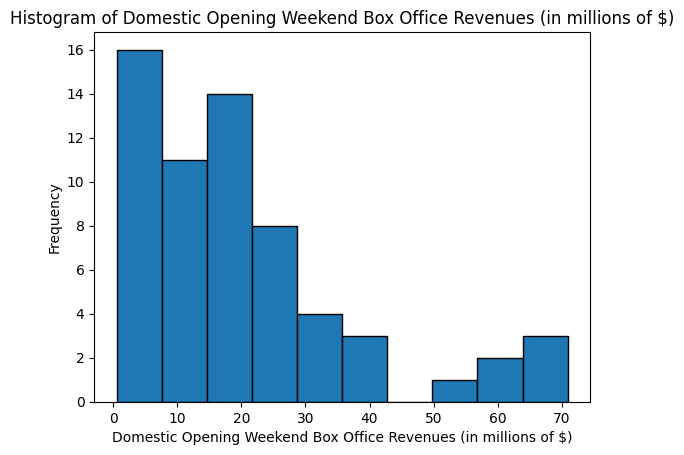

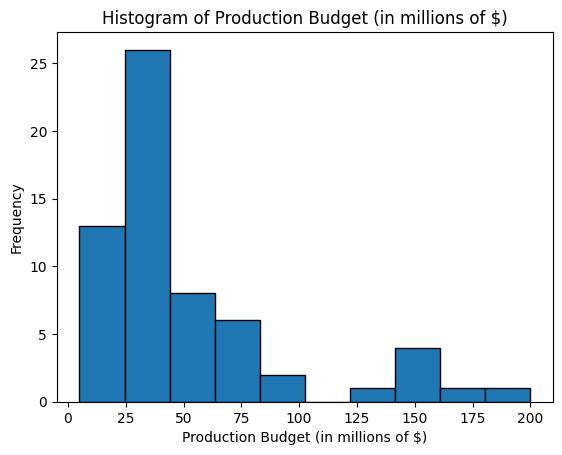

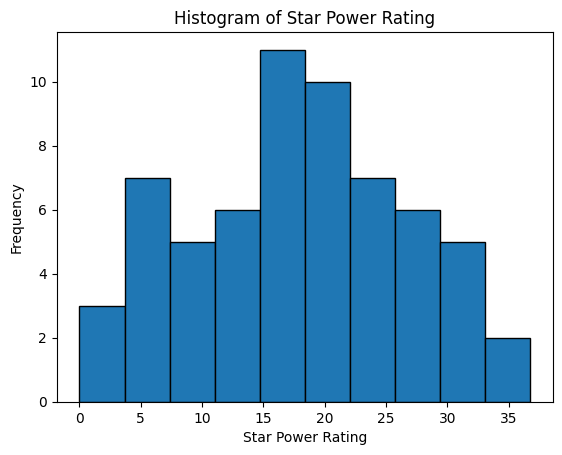

In [6]:
# histograms of "box", "budget", and "starpowr" variables
col1 = ["box", "budget", "starpowr"] # create a list of the variables of interest
title1 = ["Domestic Opening Weekend Box Office Revenues (in millions of $)", "Production Budget (in millions of $)", "Star Power Rating"]
for col in col1: # loop through the columns
  plt.hist(df[col],
         bins = 10,# split into 10 equal-width bins
           edgecolor='black') # draw a black outline around each bar of the histogram
  idx = col1.index(col) # extract the index in the column list
  coltitle = "Histogram of " + str(title1[idx])
  plt.title(coltitle) # specify histogram title
  plt.xlabel(title1[idx]) # specify x-axis label
  plt.ylabel("Frequency") # specify y-axis label
  plt.show() # show the histograms one by one

> **Observation:** The distribution of the "box" and "budget" variables are right-skewed and therefore needs log-transformation, while the distribution of the "starpowr" variable is not skewed.

In [7]:
from scipy.stats import skew
columns = ['box', 'budget', 'starpowr']
for col in columns:
  print(f"Column: {col}")
  print(f"Skewness: {skew(df[col]):}")

Column: box
Skewness: 1.4381514053596909
Column: budget
Skewness: 1.750974376843945
Column: starpowr
Skewness: -0.06579037421830648


HISTOGRAM OF LOG-TRANSFORMED "BOX" VARIABLE

Text(0, 0.5, 'Frequency')

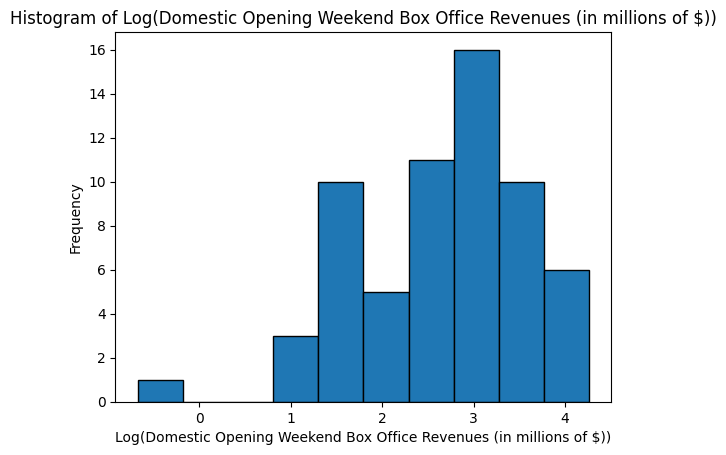

In [8]:
# Since the distribution of the "box" variable is right-skewed, we will apply the log transformation.
# histogram of log("box") variable
df["log_box"] = np.log(df["box"])
plt.hist(df["log_box"], # represent data in tens of millions
         bins = 10, # split into 10 equal-width bins
        edgecolor='black') # draw a black outline around each bar of the histogram
plt.title("Histogram of Log(Domestic Opening Weekend Box Office Revenues (in millions of $))") # specify histogram title
plt.xlabel("Log(Domestic Opening Weekend Box Office Revenues (in millions of $))") # specify x-axis label
plt.ylabel("Frequency") # specify y-axis label

HISTOGRAM OF LOG-TRANSFORMED "BUDGET" VARIABLE

Text(0, 0.5, 'Frequency')

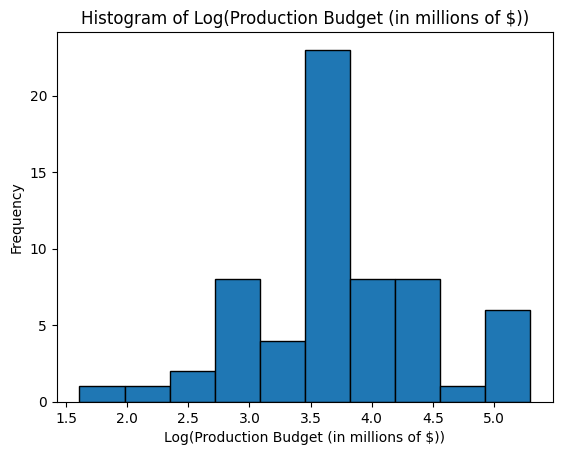

In [9]:
# Since the distribution of the "budget" variable is right-skewed, we will apply the log transformation.
# histogram of log("budget") variable
df["log_budget"] = np.log(df["budget"])
plt.hist(df["log_budget"],
         bins = 10, # split into 10 equal-width bins
         edgecolor='black') # draw a black outline around each bar of the histogram
plt.title("Histogram of Log(Production Budget (in millions of $))") # specify histogram title
plt.xlabel("Log(Production Budget (in millions of $))") # specify x-axis label
plt.ylabel("Frequency") # specify y-axis label

In [10]:
columns_log = ['log_box', 'log_budget']
for col in columns_log:
  print(f"Column: {col}")
  print(f"Skewness: {skew(df[col]):}")

Column: log_box
Skewness: -0.6777190029189326
Column: log_budget
Skewness: -0.013388491280200273


REMOVE THE ORIGINAL "BOX" AND "BUDGET" VARIABLES

In [11]:
# remove all the variables that have been applied log-transformation
df = df.drop(["box", "budget"], axis = 1)
df.head()

,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3,log_box,log_budget
0,0,0,0,19.83,0,0,1,0,0,7860.50,10,144,0.49,2.953194,3.332205
1,0,1,0,32.69,1,0,0,1,0,5737.00,59,468,0.79,4.144825,5.010635
2,0,0,0,15.69,0,0,1,0,0,850.00,24,198,0.36,1.686696,3.621671
3,0,0,1,23.62,1,1,0,0,0,15326.00,93,1778,0.76,4.212555,5.298317
4,0,1,0,19.02,0,0,0,1,0,4574.25,30,1109,0.53,3.266642,5.010635


# **QUESTION 2**

RUN LINEAR REGRESSION MODEL ON TRADITIONAL VARIABLES

In [12]:
# define X as a copy of the data frame (after log-transformation of "box" and "budget")
X = df.copy()

# define the vector X_traditional as a list of traditional variables and y as the target variable
X_traditional = X[["G", "PG", "PG13", "log_budget", "starpowr", "sequel", "action", "comedy", "animated", "horror"]]
y = df["log_box"]

# add intercept before running least squares regression using statsmodel
X_traditional = sm.add_constant(X_traditional)

# run linear regression and print the summary
lr_traditional = sm.OLS(y, X_traditional).fit() # fit linear regression model to X and y using ordinary least squares method
print('Linear Regression of Independent Variables (Without "buzz" variables)')
print()
print(lr_traditional.summary())

Linear Regression of Independent Variables (Without "buzz" variables)

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     2.656
Date:                Sat, 07 Sep 2024   Prob (F-statistic):             0.0109
Time:                        22:57:38   Log-Likelihood:                -70.832
No. Observations:                  62   AIC:                             163.7
Df Residuals:                      51   BIC:                             187.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

> $R^2$ AND ADJUSTED $R^2$


In [13]:
print(f"R^2 = {lr_traditional.rsquared:.3f}")
print(f"Adjusted R^2 = {lr_traditional.rsquared_adj:.3f}")

R^2 = 0.342
Adjusted R^2 = 0.214


> If the p-value is less than 0.10 confidence level, we reject the null hypothesis that the coefficient estimate of the corresponding independent variable is equal to 0, meaning that we can say the independent is statistically significant. Otherwise, we cannot reject the null hypothesis, meaning that the independent variable is not statistically significant.<br><br>
SIGNIFICANT VARIABLES:
*   log_budget
*   sequel
*   horror




# **QUESTION 3**

RUN LINEAR REGRESSION MODEL ON SIGNIFICANT TRADITIONAL VARIABLES

In [14]:
# run linear regression using only significant traditional variables (log_budget, sequel, and horror)
X_traditional_significant = df[["log_budget", "sequel", "horror"]]

# add intercept before running least squares regression using statsmodel
X_traditional_significant = sm.add_constant(X_traditional_significant)

# run linear regression and print the summary
lr_traditional_significant = sm.OLS(y, X_traditional_significant).fit()

print('Linear Regression of Significiant Independent Variables (Without "buzz" variables)')
print()
print(lr_traditional_significant.summary())

Linear Regression of Significiant Independent Variables (Without "buzz" variables)

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     7.929
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           0.000162
Time:                        22:57:39   Log-Likelihood:                -73.175
No. Observations:                  62   AIC:                             154.4
Df Residuals:                      58   BIC:                             162.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

> $R^2$ AND ADJUSTED $R^2$

In [15]:
print(f"R^2 = {lr_traditional_significant.rsquared:.3f}")
print(f"Adjusted R^2 = {lr_traditional_significant.rsquared_adj:.3f}")

R^2 = 0.291
Adjusted R^2 = 0.254


> SIGNIFICANT VARIABLES:<br>
All the variables are still significant at the 0.10 level because the p-values are all < 0.10.

# **QUESTION 4**

HISTORGRAMS OF 4 "BUZZ" VARIABLES: "ADDICT", "CMNGSOON", "FANDANGO", AND "CNTWAIT3"

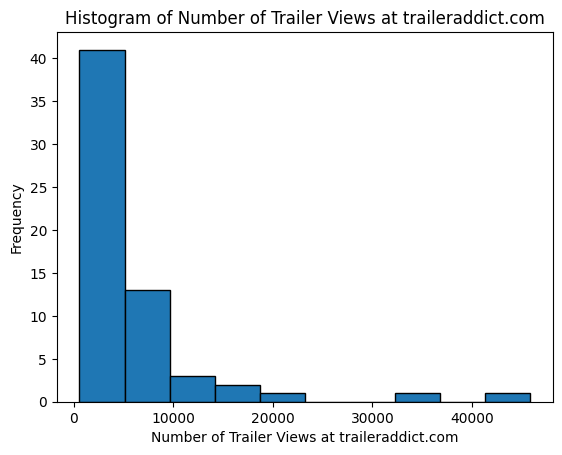

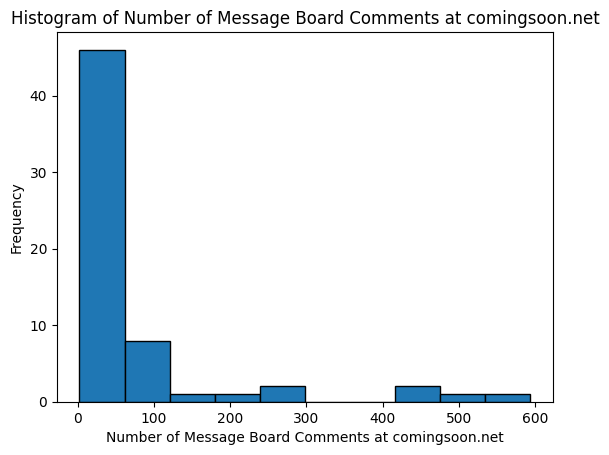

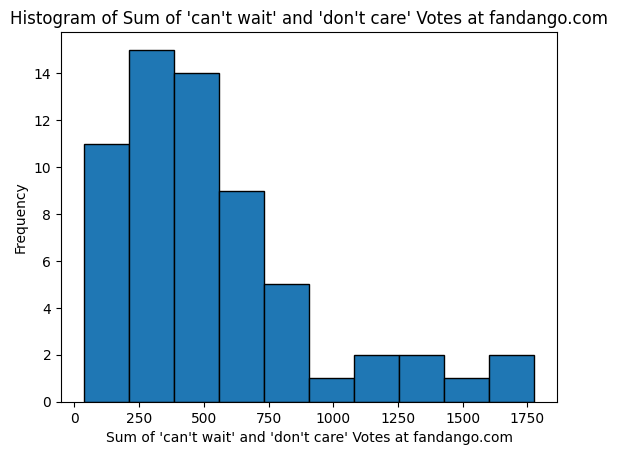

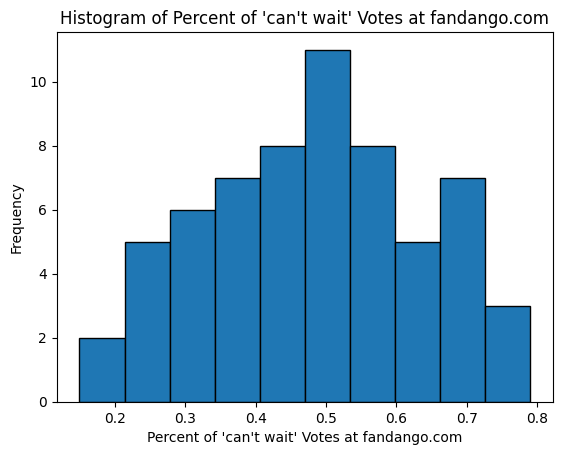

In [16]:
# histograms of "addict", "cmngsoon", "fandango", and "cntwait3" variables
col1 = ["addict", "cmngsoon", "fandango", "cntwait3"] # create a list of the variables of interest
title1 = ["Number of Trailer Views at traileraddict.com",
          "Number of Message Board Comments at comingsoon.net",
          "Sum of 'can't wait' and 'don't care' Votes at fandango.com",
          "Percent of 'can't wait' Votes at fandango.com"]
for col in col1: # loop through the columns
  plt.hist(df[col],
         bins = 10, # split into 10 equal-width bins
         edgecolor='black') # draw a black outline around each bar of the histogram
  idx = col1.index(col) # extract the index in the column list
  coltitle = "Histogram of " + str(title1[idx])
  plt.title(coltitle) # specify histogram title
  plt.xlabel(title1[idx]) # specify x-axis label
  plt.ylabel("Frequency") # specify y-axis label
  plt.show() # show the histograms one by one

> **Observation:** The distribution of the “addict”, “cmngsoon”, and “fandango” variables are right-skewed and therefore needs log-transformation. The distribution of the “cntwait3” variable is not skewed and therefore does not need log-transformation.

In [17]:
columns = ['addict', 'cmngsoon', 'fandango', 'cntwait3']
for col in columns:
  print(f"Column: {col}")
  print(f"Skewness: {skew(df[col]):}")

Column: addict
Skewness: 3.236354434055483
Column: cmngsoon
Skewness: 2.782803323082289
Column: fandango
Skewness: 1.3691199916699204
Column: cntwait3
Skewness: -0.0278952911327652


HISTOGRAM OF LOG-TRANSFORMED "ADDICT" VARIABLE

Text(0, 0.5, 'Frequency')

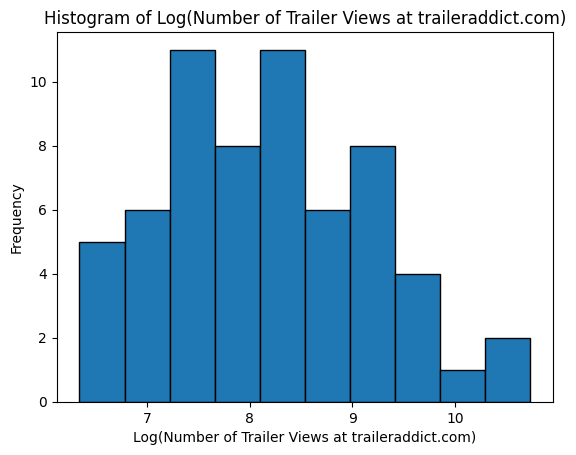

In [18]:
# Since the distribution of the "addict" variable is right-skewed, we will apply the log transformation.
# histogram of log("addict") variable
df["log_addict"] = np.log(df["addict"])
plt.hist(df["log_addict"],
         bins = 10, # split into 10 equal-width bins
        edgecolor='black') # draw a black outline around each bar of the histogram
plt.title("Histogram of Log(Number of Trailer Views at traileraddict.com)") # specify histogram title
plt.xlabel("Log(Number of Trailer Views at traileraddict.com)") # specify x-axis label
plt.ylabel("Frequency") # specify y-axis label

HISTOGRAM OF LOG-TRANSFORMED "CMNGSOON" VARIABLE

Text(0, 0.5, 'Frequency')

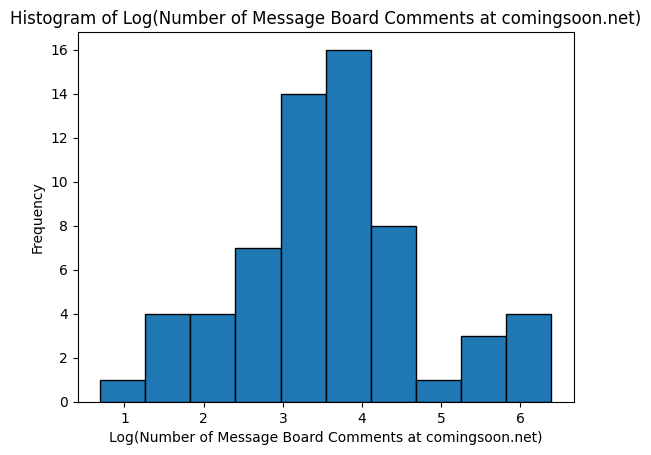

In [19]:
# Since the distribution of the "cmngsoon" variable is right-skewed, we will apply the log transformation.
# histogram of log("cmngsoon") variable
df["log_cmngsoon"] = np.log(df["cmngsoon"])
plt.hist(df["log_cmngsoon"],
         bins = 10, # split into 10 equal-width bins
        edgecolor='black') # draw a black outline around each bar of the histogram
plt.title("Histogram of Log(Number of Message Board Comments at comingsoon.net)") # specify histogram title
plt.xlabel("Log(Number of Message Board Comments at comingsoon.net)") # specify x-axis label
plt.ylabel("Frequency") # specify y-axis label

HISTOGRAM OF LOG-TRANSFORMED "FANDANGO" VARIABLE

Text(0, 0.5, 'Frequency')

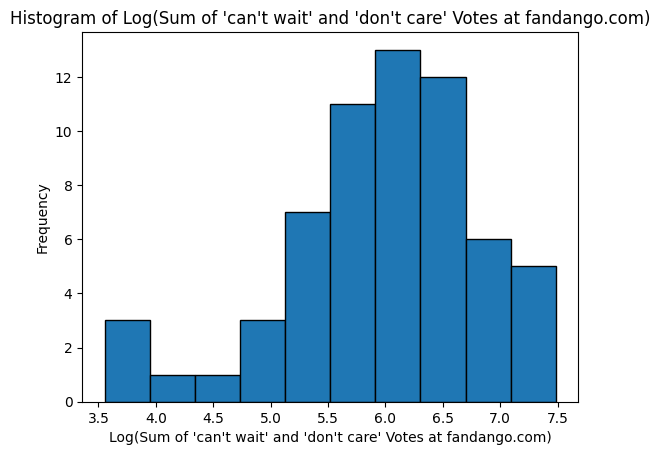

In [20]:
# Since the distribution of the "fandango" variable is right-skewed, we will apply the log transformation.
# histogram of log("fandango") variable
df["log_fandango"] = np.log(df["fandango"])
plt.hist(df["log_fandango"],
         bins = 10, # split into 10 equal-width bins
        edgecolor='black') # draw a black outline around each bar of the histogram
plt.title("Histogram of Log(Sum of 'can't wait' and 'don't care' Votes at fandango.com)") # specify histogram title
plt.xlabel("Log(Sum of 'can't wait' and 'don't care' Votes at fandango.com)") # specify x-axis label
plt.ylabel("Frequency") # specify y-axis label

REMOVE THE ORIGINAL "ADDICT", "CMNGSOON", AND "FANDANGO" VARIABLES

In [21]:
# remove all the variables that have been applied log-transformation
df = df.drop(["addict", "cmngsoon", "fandango"], axis = 1)
df.head()

,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,cntwait3,log_box,log_budget,log_addict,log_cmngsoon,log_fandango
0,0,0,0,19.83,0,0,1,0,0,0.49,2.953194,3.332205,8.969605,2.302585,4.969813
1,0,1,0,32.69,1,0,0,1,0,0.79,4.144825,5.010635,8.654692,4.077537,6.148468
2,0,0,0,15.69,0,0,1,0,0,0.36,1.686696,3.621671,6.745236,3.178054,5.288267
3,0,0,1,23.62,1,1,0,0,0,0.76,4.212555,5.298317,9.637306,4.532599,7.483244
4,0,1,0,19.02,0,0,0,1,0,0.53,3.266642,5.010635,8.428198,3.401197,7.011214


In [22]:
from scipy.stats import skew
columns_log = ['log_addict', 'log_cmngsoon', 'log_fandango']
for col in columns_log:
  print(f"Column: {col}")
  print(f"Skewness: {skew(df[col]):}")

Column: log_addict
Skewness: 0.32296008702183504
Column: log_cmngsoon
Skewness: 0.23206288718866552
Column: log_fandango
Skewness: -0.8302038681942592


# **QUESTION 5**

RUN LINEAR REGRESSION MODEL ON ALL VARIABLES

In [23]:
# define X as a copy of the data frame (after log-transformations)
X = df.copy()

# define the vector X_all as a list of all independent ariables and y as the target variable
X_all = X.drop(["log_box"], axis = 1)
y = df["log_box"]

# add intercept before running least squares regression using statsmodel
X_all = sm.add_constant(X_all)

# run linear regression and print the summary
lr_all = sm.OLS(y, X_all).fit() # fit linear regression model to X and y using ordinary least squares method
print('Linear Regression of Independent Variables (Including "buzz" variables)')
print()
print(lr_all.summary())

Linear Regression of Independent Variables (Including "buzz" variables)

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           3.77e-06
Time:                        22:57:39   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

> $R^2$ AND ADJUSTED $R^2$

In [24]:
print(f"R^2 = {lr_all.rsquared:.3f}")
print(f"Adjusted R^2 = {lr_all.rsquared_adj:.3f}")

R^2 = 0.624
Adjusted R^2 = 0.512


> SIGNIFICANT VARIABLES: <br>
*   Intercept
*   PG
*   action
*   animated
*   cntwait3
*   log_addict





# **QUESTION 6**

RUN LINEAR REGRESSION MODEL ON SIGNIFICANT VARIABLES

In [25]:
# run linear regression using only significant variables (intercept, PG, action, animated, log_addict, and cntwait3)
X_all_significant = df[["PG", "action", "animated", "cntwait3", "log_addict"]]

# add intercept before running least squares regression using statsmodel
X_all_significant = sm.add_constant(X_all_significant)

# run linear regression and print the summary
lr_all_significant = sm.OLS(y, X_all_significant).fit() # fit linear regression model to X and y using ordinary least squares method
print('Linear Regression of Significiant Independent Variables (Including "buzz" variables)')
print()
print(lr_all_significant.summary())

Linear Regression of Significiant Independent Variables (Including "buzz" variables)

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     14.15
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           6.06e-09
Time:                        22:57:39   Log-Likelihood:                -58.512
No. Observations:                  62   AIC:                             129.0
Df Residuals:                      56   BIC:                             141.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

> $R^2$ AND ADJUSTED $R^2$

In [26]:
print(f"R^2 = {lr_all_significant.rsquared:.3f}")
print(f"Adjusted R^2 = {lr_all_significant.rsquared_adj:.3f}")

R^2 = 0.558
Adjusted R^2 = 0.519


> SIGNIFICANT VARIABLES:<br>
All variables, except PG, are still statistically significant at 0.10 level.

# **QUESTION 7**
(Please see report)

# **QUESTION 8**

APPLY PRINCIPAL COMPONENT ANALYSIS TO 4 "BUZZ" VARIABLES

Standardize the transformed "buzz" variables

In [27]:
# standardize the transformed "buzz" variables
X_buzz = df[["log_addict", "log_cmngsoon", "log_fandango", "cntwait3"]]
sc = prep.StandardScaler() # define Standard Scaler object
sX_buzz = pd.DataFrame(sc.fit_transform(X_buzz), columns = X_buzz.columns)
sc.scale_ = np.std(sX_buzz, axis = 0, ddof = 1).to_list() # calculate the standard devidation scale
sX_buzz = sX_buzz / sc.scale_ # reflect sample std instead of population std used in fit_transform

Apply PCA

In [28]:
pca4 = PCA() # define the PCA object
pcs4 = pca4.fit_transform(sX_buzz)
pcs4 # standardized data

array([[-5.91215632e-01, -1.12041949e+00,  7.39574630e-01,
        -9.94585301e-01],
       [ 1.61599216e+00, -2.86131263e-01, -7.63647896e-01,
        -1.01050965e+00],
       [-1.64437568e+00, -5.58746441e-02, -7.00252306e-01,
         4.32819585e-01],
       [ 2.80644514e+00,  7.42426566e-01,  2.29836974e-01,
        -7.37824941e-01],
       [ 6.62449820e-01,  1.01754948e+00,  2.74396331e-01,
        -3.50744888e-01],
       [ 4.01772146e+00,  1.42241249e-01,  3.63525721e-01,
         2.12373105e-01],
       [-3.89000437e-01, -3.92696784e-01,  1.23050812e-01,
        -4.38680730e-01],
       [-4.75868693e-01,  4.37608754e-01, -3.62617771e-01,
        -1.68352772e+00],
       [ 7.92344628e-01, -3.69453306e-02, -4.83523141e-01,
         1.51924646e-02],
       [ 1.83982155e+00,  8.61568574e-02, -9.58945421e-01,
         9.97398559e-01],
       [-2.84255764e+00, -1.87729616e+00,  2.74605936e-02,
         4.60077807e-01],
       [-3.16427339e+00,  5.47154332e-01,  2.54173256e-03,
      

Print eigenvalues of the correlation matrix

In [29]:
print("\nEigenvalues of Correlation Matrix:")
egnval4 = pca4.explained_variance_
print(egnval4)


Eigenvalues of Correlation Matrix:
[2.41420026 0.77519959 0.45214886 0.3584513 ]


Calculate and print the cumulative sum of explained variance ratios

In [30]:
# cumulative sum of explained variance ratios
expldvarpca4 = pca4.explained_variance_ratio_ # calculate the variance explained by each PC
egnvalsum4 = np.cumsum(expldvarpca4) # calculate the cumulative sum of those variances
print("\nCumulative Sum of Explained Variance")
print(egnvalsum4)


Cumulative Sum of Explained Variance
[0.60355006 0.79734996 0.91038718 1.        ]


Determine the number of PCs based on:
<ol type = "i">
  <li> Kaiser's rule
  <li> Explained variance threshold of 60%
  <li> Explained variance threshold of 70%
  <li> Explained variance threshold of 80%
  <li> Explained variance threshold of 90%

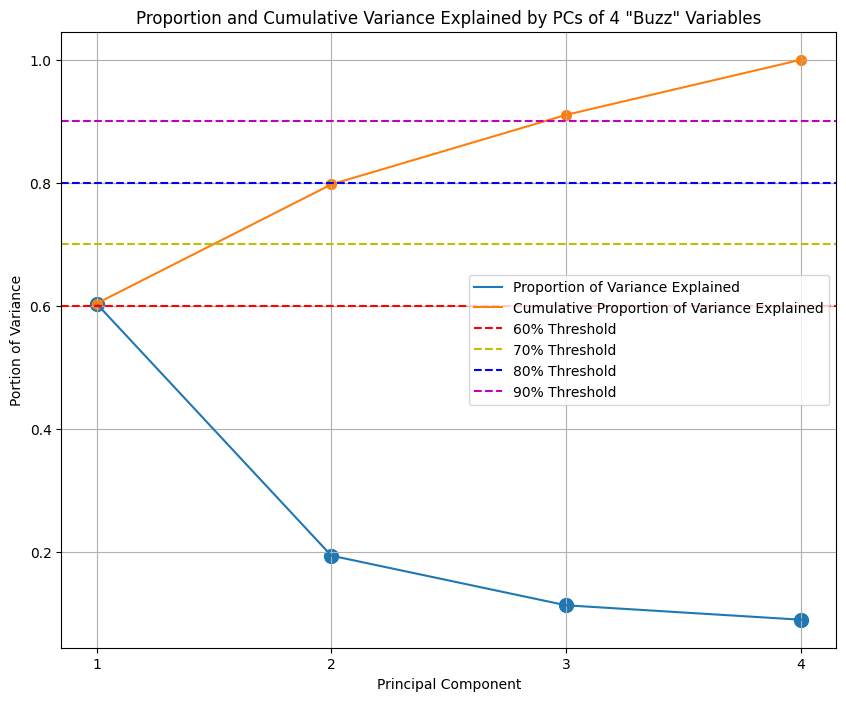

In [31]:
# Create a figure with the specified size
plt.figure(figsize=(10, 8))
plt.xlabel("Principal Component")
plt.ylabel("Portion of Variance")
plt.xticks(np.arange(1,5))

# Plot Proportion of Variance Explained
plt.plot(np.arange(1,5), expldvarpca4,label='Proportion of Variance Explained')
plt.scatter(np.arange(1,5), expldvarpca4,s=100)

# Plot Cumulative Variance Explained
plt.plot(np.arange(1,5), egnvalsum4,label='Cumulative Proportion of Variance Explained')
plt.scatter(np.arange(1,5), egnvalsum4,s=50)

# Add horizontal lines for thresholds
plt.axhline(y=0.60, color='r', linestyle='--', label='60% Threshold')
plt.axhline(y=0.70, color='y', linestyle='--', label='70% Threshold')
plt.axhline(y=0.80, color='b', linestyle='--', label='80% Threshold')
plt.axhline(y=0.90, color='m', linestyle='--', label='90% Threshold')

plt.grid(True)
plt.title('Proportion and Cumulative Variance Explained by PCs of 4 "Buzz" Variables')
plt.legend()
plt.show()

In [32]:
# number of PCs based on Kaiser's rule and explained variance thresholds

# Kaiser's rule - select PCs > 1
pcs4_kaiser = sum(1 for egnval in egnval4 if egnval > 1) # or np.sum(egnval4 > 1) - egnval4 > 1 creates a boolean array -> sum of all True/1 elements
print(f"Number of PCs selected based on Kaiser's rule: {pcs4_kaiser} PC(s)")

# explained variance thresholds
thresholds = [0.6, 0.7, 0.8, 0.9] # define thresholds
pcs4_num_PC = {} # define a dictionary to store number of PCs corresponding to each threshold
for threshold in thresholds: # loop through each threshold
  # find the index where the condition is first met (cumulative sum of explained variance >= threshold)
  index = np.argmax(egnvalsum4 >= threshold)

  # check if threshold is actually reached
  if egnvalsum4[index] >= threshold:
    pcs4_num_PC[threshold] = index + 1
  else:
    pcs4_num_PC[threshold] = len(egnvalsum4)

print("Number of PCs selected for each explained variance threshold:")
for threshold, num in pcs4_num_PC.items():
  print(f"Threshold {threshold:.0%}: {num} PC(s)")

Number of PCs selected based on Kaiser's rule: 1 PC(s)
Number of PCs selected for each explained variance threshold:
Threshold 60%: 1 PC(s)
Threshold 70%: 2 PC(s)
Threshold 80%: 3 PC(s)
Threshold 90%: 3 PC(s)


# **QUESTION 9**

RUN LINEAR REGRESSION MODEL ON TRADITIONAL VARIABLES + PRINCIPAL COMPONENTS OF 4 "BUZZ" VARIABLES

Define vector of predictors (concatenate traditional variables and 4 PCs)

In [33]:
# make a copy of X_traditional
X_tradPCA4 = X_traditional.copy()

# convert pcs4 from nparray to pd dataframe
pcs4df = pd.DataFrame(pcs4, columns = ["PC1", "PC2", "PC3", "PC4"])

# define the vector X_tradPCA4 as a list of traditional variables and 4 PCs
X_tradPCA4 = pd.concat((X_tradPCA4, pcs4df), axis = 1)
X_tradPCA4.head()

,const,G,PG,PG13,log_budget,starpowr,sequel,action,comedy,animated,horror,PC1,PC2,PC3,PC4
0,1.0,0,0,0,3.332205,19.83,0,0,1,0,0,-0.591216,-1.120419,0.739575,-0.994585
1,1.0,0,1,0,5.010635,32.69,1,0,0,1,0,1.615992,-0.286131,-0.763648,-1.010510
2,1.0,0,0,0,3.621671,15.69,0,0,1,0,0,-1.644376,-0.055875,-0.700252,0.432820
3,1.0,0,0,1,5.298317,23.62,1,1,0,0,0,2.806445,0.742427,0.229837,-0.737825
4,1.0,0,1,0,5.010635,19.02,0,0,0,1,0,0.662450,1.017549,0.274396,-0.350745


Run linear regression model

In [34]:
# add intercept before running least squares regression using statsmodel
X_tradPCA4 = sm.add_constant(X_tradPCA4)

# run linear regression and print the summary
lr_tradPCA4 = sm.OLS(y, X_tradPCA4).fit() # fit linear regression model to X and y using ordinary least squares method
print('Linear Regression of Significiant Independent Variables (Excluding "buzz" variables) + PCs of 4 "Buzz" Variables')
print()
print(lr_tradPCA4.summary())

Linear Regression of Significiant Independent Variables (Excluding "buzz" variables) + PCs of 4 "Buzz" Variables

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           3.77e-06
Time:                        22:57:40   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

> $R^2$ AND ADJUSTED $R^2$

In [35]:
print(f"R^2 = {lr_tradPCA4.rsquared:.3f}")
print(f"Adjusted R^2 = {lr_tradPCA4.rsquared_adj:.3f}")

R^2 = 0.624
Adjusted R^2 = 0.512


> SIGNIFICANT VARIABLES:<br>
*   Intercept
*   PG
*   action
*   animated
*   PC1



> **Observation:**
*   Of all 4 principal components, only the first principal component is statistically significant.
*   This model uses the PCs of the 4 "buzz" variables while the others are solely using the traditional variables.
*   I would still keep the model in Question 6 because its adjusted R2 is still higher than this model’s adjusted $R^2$ (0.519 vs 0.512), and the model in Question 6 has fewer predictors, which makes it easier to interpret. Also, incorporating the principal components may reduce interpretability because principal components are linear combinations of the original variables. Given that there is no improvement in predictive power, the model in Question 6 is preferred.


# **QUESTION 10**

RUN LINEAR REGRESSION MODEL ON TRADITIONAL VARIABLES + PC1 OF 4 "BUZZ" VARIABLES (based on Kaiser's rule and explained variance threshold of 60%)

In [36]:
# run linear regression with traditional variables + PC1 only (based on Kaiser's rule and "explained variance" threshold of 60%)

# make a copy of the X_tradPCA4 and drop the unnecessary PCs
X_tradPCA1 = X_tradPCA4.copy()
X_tradPCA1 = X_tradPCA1.drop(["PC2", "PC3", "PC4"], axis = 1)

# add intercept before running least squares regression using statsmodel
X_tradPCA1 = sm.add_constant(X_tradPCA1)

# run linear regression and print the summary
lr_PCA1 = sm.OLS(y, X_tradPCA1).fit()
print("Linear Regression Using 1 PC based on Kaiser's Rule & Explained Variance Using 60% Threshold")
print()
print(lr_PCA1.summary())

Linear Regression Using 1 PC based on Kaiser's Rule & Explained Variance Using 60% Threshold

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     6.510
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           1.39e-06
Time:                        22:57:40   Log-Likelihood:                -56.278
No. Observations:                  62   AIC:                             136.6
Df Residuals:                      50   BIC:                             162.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

RUN LINEAR REGRESSION MODEL ON TRADITIONAL VARIABLES + PC1 & PC2 OF 4 "BUZZ" VARIABLES (based on explained variance threshold of 70%)

In [37]:
# run linear regression with traditional variables + PC1 and PC2 (based on "explained variance" threshold of 70%)

# make a copy of the X_tradPCA4 and drop the unnecessary PCs
X_tradPCA2 = X_tradPCA4.copy()
X_tradPCA2 = X_tradPCA2.drop(["PC3", "PC4"], axis = 1)

# add intercept before running least squares regression using statsmodel
X_tradPCA2 = sm.add_constant(X_tradPCA2)

# run linear regression and print the summary
lr_PCA2 = sm.OLS(y, X_tradPCA2).fit()
print("Linear Regression Using 2 PCs based on Explained Variance using 70% Threshold")
print()
print(lr_PCA2.summary())

Linear Regression Using 2 PCs based on Explained Variance using 70% Threshold

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     6.357
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           1.27e-06
Time:                        22:57:40   Log-Likelihood:                -54.729
No. Observations:                  62   AIC:                             135.5
Df Residuals:                      49   BIC:                             163.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

RUN LINEAR REGRESSION MODEL ON TRADITIONAL VARIABLES + PC1, PC2, & PC3 OF 4 "BUZZ" VARIABLES (based on explained variance threshold of 80% & 90%)

In [38]:
# run linear regression with traditional variables + PC1, PC2, and PC3 (based on "explained variance" threshold of 80% or 90%)

# make a copy of the X_tradPCA4 and drop the unnecessary PCs
X_tradPCA3 = X_tradPCA4.copy()
X_tradPCA3 = X_tradPCA3.drop(["PC4"], axis = 1)

# add intercept before running least squares regression using statsmodel
X_tradPCA3 = sm.add_constant(X_tradPCA3)

# run linear regression and print the summary
lr_PCA3 = sm.OLS(y, X_tradPCA3).fit()
print("Linear Regression Using 3 PCs based on Explained Variance using 80/90% Threshold")
print()
print(lr_PCA3.summary())

Linear Regression Using 3 PCs based on Explained Variance using 80/90% Threshold

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     5.752
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           3.32e-06
Time:                        22:57:40   Log-Likelihood:                -54.715
No. Observations:                  62   AIC:                             137.4
Df Residuals:                      48   BIC:                             167.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

> **Observation:**
*   It is apparent that the model using all 4 PCs yields the same results as the model in Q5. This is because using all 4 PCs altogether only rearranges the coefficient estimates on the 4 original “buzz” variables but does not change the model prediction and complexity.
*   I recommend choosing the regression model using the traditional variables, PC1, and PC2 because it has the highest adjusted R2 and lowest AIC and BIC. Although the adjusted $R^2$ of the model using all 4 PCs is extremely close, it has more predictors and therefore is harder to interpret and may overfit. PC1 and PC2 together also explain most of the variability of the "buzz" variables (~80%).



# **QUESTION 11**

APPLY PRINCIPAL COMPONENT ANALYSIS TO 4 "BUZZ" VARIABLES + "BUDGET" + "STARPOWR"




Standardize the 4 "buzz" variables + "budget" + "starpowr"



In [39]:
# standardize the transformed "buzz" variables and other continuous variables
X_buzzcont = df[["log_addict", "log_cmngsoon", "log_fandango", "cntwait3", "log_budget", "starpowr"]]
sc = prep.StandardScaler() # define Standard Scaler object
sX_buzzcont = pd.DataFrame(sc.fit_transform(X_buzzcont), columns = X_buzzcont.columns)
sc.scale_ = np.std(sX_buzzcont, axis = 0, ddof = 1).to_list() # calculate the standard deviation scale
sX_buzzcont = sX_buzzcont / sc.scale_ # reflect sample std instead of population std used in fit_transform

Apply PCA

In [40]:
pca6 = PCA() # define the PCA object
pcs6 = pca6.fit_transform(sX_buzzcont)
pcs6 # standardized data

array([[-7.27799512e-01, -3.81623052e-02, -1.20415831e+00,
         1.12346596e+00, -1.17356800e-01,  4.48392488e-01],
       [ 2.63794560e+00,  1.37023291e+00, -1.07723945e+00,
        -2.51878968e-01,  1.34171893e-02,  3.66719907e-01],
       [-1.54293240e+00,  4.69245123e-01, -7.65199118e-02,
        -8.57879059e-01,  2.78869526e-01, -2.24304281e-01],
       [ 3.60513005e+00,  4.58781932e-01,  3.88755197e-01,
         3.45630796e-01,  6.90653747e-01,  4.45240442e-01],
       [ 1.45341918e+00,  8.92620953e-01,  7.77003175e-01,
         1.50703093e-01,  1.12730412e+00,  2.18117375e-01],
       [ 3.30869856e+00, -2.10027953e+00,  5.58947293e-01,
         3.37117508e-01, -8.04135626e-01,  1.43217599e-01],
       [ 4.44569433e-01,  1.04054439e+00, -6.79635285e-01,
         1.35828394e-01,  1.18629559e+00, -5.51560636e-02],
       [ 5.42712742e-01,  2.31344817e+00, -5.80106419e-01,
         3.53553190e-01, -1.96061489e-01,  9.34399818e-01],
       [ 3.64463594e-01, -1.18658235e+00,  2.639

Print eigenvalues of the correlation matrix

In [41]:
print("\n Eigenvalues of Correlation Matrix:")
egnval6 = pca6.explained_variance_
print(egnval6)


 Eigenvalues of Correlation Matrix:
[2.83823382 1.45442671 0.70232212 0.44299297 0.34049709 0.2215273 ]


Calculate and print the cumulative sum of explained variance ratios

In [42]:
# cumulative sum of explained variance ratios
expldvarpca6 = pca6.explained_variance_ratio_ # calculate the variance explained by each PC
egnvalsum6 = np.cumsum(expldvarpca6) # calculate the cumulative sum of those variances
print("\nCumulative Sum of Explained Variance")
print(egnvalsum6)


Cumulative Sum of Explained Variance
[0.47303897 0.71544342 0.83249711 0.90632927 0.96307878 1.        ]


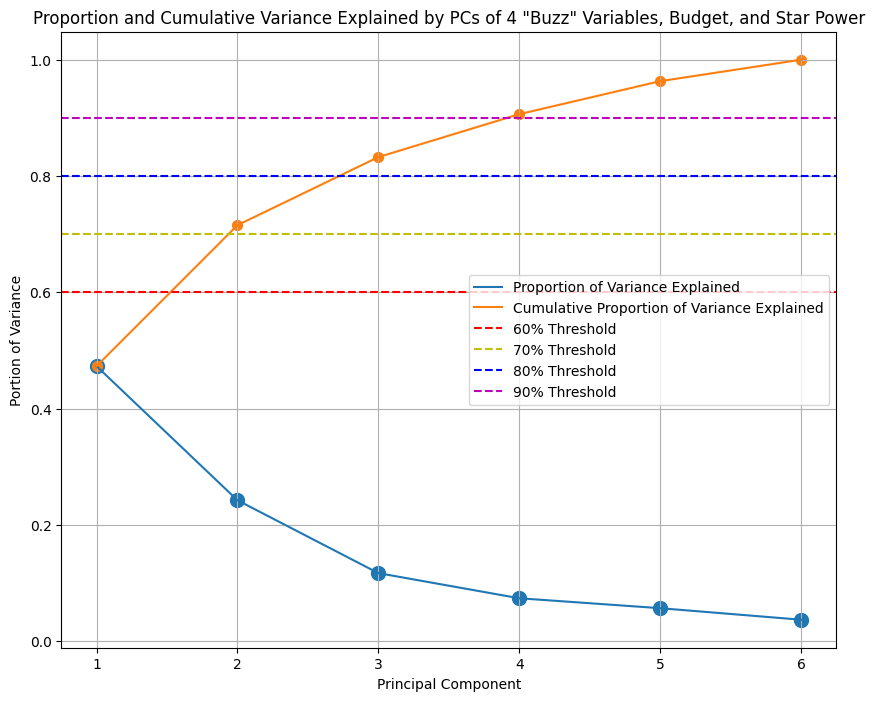

In [43]:
# Create a figure with the specified size
plt.figure(figsize=(10, 8))
plt.xlabel("Principal Component")
plt.ylabel("Portion of Variance")
plt.xticks(np.arange(1,7))

# Plot Proportion of Variance Explained
plt.plot(np.arange(1,7), expldvarpca6,label='Proportion of Variance Explained')
plt.scatter(np.arange(1,7), expldvarpca6,s=100)

# Plot Cumulative Variance Explained
plt.plot(np.arange(1,7), egnvalsum6,label='Cumulative Proportion of Variance Explained')
plt.scatter(np.arange(1,7), egnvalsum6,s=50)

# Add horizontal lines for thresholds
plt.axhline(y=0.60, color='r', linestyle='--', label='60% Threshold')
plt.axhline(y=0.70, color='y', linestyle='--', label='70% Threshold')
plt.axhline(y=0.80, color='b', linestyle='--', label='80% Threshold')
plt.axhline(y=0.90, color='m', linestyle='--', label='90% Threshold')

plt.grid(True)
plt.title('Proportion and Cumulative Variance Explained by PCs of 4 "Buzz" Variables, Budget, and Star Power')
plt.legend()
plt.show()

Determine the number of PCs based on:
<ol type = "i">
  <li> Kaiser's rule
  <li> Explained variance threshold of 60%
  <li> Explained variance threshold of 70%
  <li> Explained variance threshold of 80%
  <li> Explained variance threshold of 90%

In [44]:
# number of PCs based on Kaiser's rule and explained variance thresholds

# Kaiser's rule - select PCs > 1
pcs6_kaiser = sum(1 for egnval in egnval6 if egnval > 1) # or np.sum(egnval6 > 1) - egnval6 > 1 creates a boolean array -> sum of all True/1 elements
print(f"Number of PCs selected based on Kaiser's rule: {pcs6_kaiser} PC(s)")

# explained variance thresholds
thresholds = [0.6, 0.7, 0.8, 0.9] # define thresholds
pcs6_num_PC = {} # define a dictionary to store number of PCs corresponding to each threshold
for threshold in thresholds: # loop through each threshold
  # find the index where the condition is first met (cumulative sum of explained variance >= threshold)
  index = np.argmax(egnvalsum6 >= threshold)

  # check if threshold is actually reached
  if egnvalsum6[index] >= threshold:
    pcs6_num_PC[threshold] = index + 1
  else:
    pcs6_num_PC[threshold] = len(egnvalsum6)

print("Number of PCs selected for each explained variance threshold:")
for threshold, num in pcs6_num_PC.items():
  print(f"Threshold {threshold:.0%}: {num} PC(s)")

Number of PCs selected based on Kaiser's rule: 2 PC(s)
Number of PCs selected for each explained variance threshold:
Threshold 60%: 2 PC(s)
Threshold 70%: 2 PC(s)
Threshold 80%: 3 PC(s)
Threshold 90%: 4 PC(s)


# **QUESTION 12**

Define vector of predictors (concatenate 6 variables + 4 PCs)

In [45]:
# make a copy of X_buzzcont
X_buzzPCA4 = X_buzzcont.copy()

# convert pcs6 from nparray to pd dataframe
pcs6df = pd.DataFrame(pcs6, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"])

# define the vector X_buzzPCA6 as a list of "buzz" variables, other continuous variables, and all 6 PCs
X_buzzPCA4 = pd.concat((X_buzzPCA4, pcs6df), axis = 1)

# drop PC5 and PC6 from the data frame
X_buzzPCA4 = X_buzzPCA4.drop(["PC5", "PC6"], axis = 1)
X_buzzPCA4.head()

,log_addict,log_cmngsoon,log_fandango,cntwait3,log_budget,starpowr,PC1,PC2,PC3,PC4
0,8.969605,2.302585,4.969813,0.49,3.332205,19.83,-0.727800,-0.038162,-1.204158,1.123466
1,8.654692,4.077537,6.148468,0.79,5.010635,32.69,2.637946,1.370233,-1.077239,-0.251879
2,6.745236,3.178054,5.288267,0.36,3.621671,15.69,-1.542932,0.469245,-0.076520,-0.857879
3,9.637306,4.532599,7.483244,0.76,5.298317,23.62,3.605130,0.458782,0.388755,0.345631
4,8.428198,3.401197,7.011214,0.53,5.010635,19.02,1.453419,0.892621,0.777003,0.150703


RUN LINEAR REGRESSION MODEL ON 6 VARIABLES + PC1 & PC2 (based on Kaiser's rule and explained variance threshold of 60% & 70%)

In [46]:
# run linear regression with "buzz" variables + other continuous variables + PC1 and PC2 (based on Kaiser's rule and "explained variance" threshold of 60% or 70%)

# make a copy of the X_buzzPCA4 and drop the unnecessary PCs
X_buzzPCA2 = X_buzzPCA4.copy()
X_buzzPCA2 = X_buzzPCA2.drop(["PC3", "PC4"], axis = 1)

# add intercept before running least squares regression using statsmodel
X_buzzPCA2 = sm.add_constant(X_buzzPCA2)

# run linear regression and print the summary
lr_buzzPCA2 = sm.OLS(y, X_buzzPCA2).fit()
print("Linear Regression Using 2 PCs based on Kaiser's Rule and Using 60/70% Threshold")
print()
print(lr_buzzPCA2.summary())

Linear Regression Using 2 PCs based on Kaiser's Rule and Using 60/70% Threshold

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     8.291
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           2.07e-06
Time:                        22:57:40   Log-Likelihood:                -63.859
No. Observations:                  62   AIC:                             141.7
Df Residuals:                      55   BIC:                             156.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

RUN LINEAR REGRESSION MODEL ON 6 VARIABLES + PC1, PC2, & PC3 (based on explained variance threshold of 80%)

In [47]:
# run linear regression with "buzz" variables + other continuous variables + PC1, PC2, and PC3 (based on "explained variance" threshold of 80%)

# make a copy of the X_buzzPCA4 and drop the unnecessary PCs
X_buzzPCA3 = X_buzzPCA4.copy()
X_buzzPCA3 = X_buzzPCA3.drop(["PC4"], axis = 1)

# add intercept before running least squares regression using statsmodel
X_buzzPCA3 = sm.add_constant(X_buzzPCA3)

# run linear regression and print the summary
lr_buzzPCA3 = sm.OLS(y, X_buzzPCA3).fit()
print("Linear Regression Using 3 PCs based on Kaiser's Rule and Using 80% Threshold")
print()
print(lr_buzzPCA3.summary())

Linear Regression Using 3 PCs based on Kaiser's Rule and Using 80% Threshold

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     8.291
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           2.07e-06
Time:                        22:57:40   Log-Likelihood:                -63.859
No. Observations:                  62   AIC:                             141.7
Df Residuals:                      55   BIC:                             156.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

RUN LINEAR REGRESSION MODEL ON 6 VARIABLES + PC1, PC2, PC3 & PC4 (based on explained variance threshold of 90%)

In [48]:
# run linear regression with "buzz" variables + other continuous variables + PC1, PC2, PC3, and PC4 (based on "explained variance" threshold of 90%)

# add intercept before running least squares regression using statsmodel
X_buzzPCA4 = sm.add_constant(X_buzzPCA4)

# run linear regression and print the summary
lr_buzzPCA4 = sm.OLS(y, X_buzzPCA4).fit()
print("Linear Regression Using 4 PCs based on Kaiser's Rule and Using 90% Threshold")
print()
print(lr_buzzPCA4.summary())

Linear Regression Using 4 PCs based on Kaiser's Rule and Using 90% Threshold

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     8.291
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           2.07e-06
Time:                        22:57:40   Log-Likelihood:                -63.859
No. Observations:                  62   AIC:                             141.7
Df Residuals:                      55   BIC:                             156.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

> **Observation:**
*   All the above models have the same $R^2$, adjusted $R^2$, and AIC/BIC, which indicates the multicollinearity issue because each of the PCs used is a linear combination of all the other variables (4 “buzz” variables and 2 continuous variables). Adding or removing any PCs from the model only rearranges the coefficients among the original variables, rather than changing the prediction or model quality. In other words, none of these 4 models is superior to the others.
*   Models with severe multicollinearity (i.e., redundant variables) should not be recommended.



# **QUESTION 13**

(Please see report)

# **QUESTION 14**

(Please see report)